# Data loading


In [45]:
import pandas as pd

path = "data/dataset.csv"   
df = pd.read_csv(path)   

print(">>> shape")
print(df.shape)

print("\n>>> columns")
print(list(df.columns))

print("\n>>> dtypes & non-null counts")
print(df.info())

print("\n>>> first 10 rows")
display(df.head(10))

print("\n>>> basic stats (all cols)")
print(df.describe(include='all').T)

print("\n>>> missing values (sorted)")
print(df.isnull().sum().sort_values(ascending=False))

print("\n>>> duplicate rows count")
print(df.duplicated().sum())

price_cols = [c for c in df.columns if 'price' in c.lower() or 'amount' in c.lower() or 'value' in c.lower()]
print("\n>>> price-like columns detected:", price_cols)

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for c in cat_cols:
    print(f" - {c}: {df[c].nunique()} unique values; sample values ->", df[c].dropna().unique()[:8])


>>> shape
(11500, 26)

>>> columns
['brand', 'model', 'year', 'age', 'mileage', 'mileage_per_year', 'engine_size', 'fuel_type', 'transmission', 'condition', 'condition_score', 'owner_count', 'color', 'body_type', 'is_luxury', 'mpg_estimate', 'price_usd', 'price_local', 'price_category', 'market_segment', 'depreciation_rate', 'value_retention', 'insurance_estimate', 'power_to_weight_ratio', 'regional_factor', 'source']

>>> dtypes & non-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  11500 non-null  object 
 1   model                  11500 non-null  object 
 2   year                   11500 non-null  int64  
 3   age                    11500 non-null  int64  
 4   mileage                11500 non-null  int64  
 5   mileage_per_year       11500 non-null  float64
 6   engine_size       

,brand,model,year,age,mileage,mileage_per_year,engine_size,fuel_type,transmission,condition,...,price_usd,price_local,price_category,market_segment,depreciation_rate,value_retention,insurance_estimate,power_to_weight_ratio,regional_factor,source
0,Mercedes,GLC,2013,11,788,71.636364,3.0,Petrol,Automatic,Excellent,...,72175,72175.0,Luxury,Luxury,0.233608,0.766392,990,0.058824,1.0,Dataset1_Kaggle_Style
1,Audi,A3,2016,8,135798,16974.750000,2.0,Diesel,Automatic,Good,...,32357,32357.0,Premium,Luxury,0.330872,0.669128,1080,0.041667,1.0,Dataset1_Kaggle_Style
2,Nissan,Sentra,2016,8,82980,10372.500000,5.0,Hybrid,Automatic,Good,...,37672,37672.0,Premium,Mid-Market,0.298107,0.701893,936,0.104167,1.0,Dataset1_Kaggle_Style
3,Ford,Explorer,2019,5,90767,18153.400000,2.0,Diesel,Manual,Excellent,...,16332,16332.0,Mid-Range,Economy,0.379766,0.620234,900,0.044444,1.0,Dataset1_Kaggle_Style
4,Audi,A3,2006,18,4896,272.000000,1.0,Petrol,Manual,Good,...,21368,21368.0,Mid-Range,Mid-Market,0.627528,0.372472,810,0.017241,1.0,Dataset1_Kaggle_Style
5,Chevrolet,Malibu,2022,2,67119,33559.500000,3.0,Petrol,Automatic,Excellent,...,32426,32426.0,Premium,Mid-Market,0.109812,0.890188,1188,0.071429,1.0,Dataset1_Kaggle_Style
6,BMW,X1,2017,7,160839,22977.000000,1.6,Petrol,Automatic,Good,...,31697,31697.0,Premium,Luxury,0.306366,0.693634,1123,0.034043,1.0,Dataset1_Kaggle_Style
7,Honda,Pilot,2018,6,56745,9457.500000,1.2,Petrol,Manual,Good,...,21215,21215.0,Mid-Range,Mid-Market,0.361283,0.638717,772,0.026087,1.0,Dataset1_Kaggle_Style
8,BMW,5 Series,2009,15,42263,2817.533333,1.0,Petrol,Automatic,Good,...,20728,20728.0,Mid-Range,Mid-Market,0.591389,0.408611,810,0.018182,1.0,Dataset1_Kaggle_Style
9,Nissan,Altima,2014,10,145596,14559.600000,1.4,Petrol,Automatic,Good,...,17229,17229.0,Mid-Range,Economy,0.537216,0.462784,564,0.028000,1.0,Dataset1_Kaggle_Style



>>> basic stats (all cols)
                         count unique                    top  freq  \
brand                    11500     24                  Honda  1095   
model                    11500    170                  Civic   240   
year                   11500.0    NaN                    NaN   NaN   
age                    11500.0    NaN                    NaN   NaN   
mileage                11500.0    NaN                    NaN   NaN   
mileage_per_year       11500.0    NaN                    NaN   NaN   
engine_size            11500.0    NaN                    NaN   NaN   
fuel_type                11500      5                 Petrol  6073   
transmission             11500      2              Automatic  6976   
condition                11500      4                   Good  5835   
condition_score        11500.0    NaN                    NaN   NaN   
owner_count            11500.0    NaN                    NaN   NaN   
color                    11500      8                   Gray  

# Data Preprocessing

In [46]:
import pandas as pd
import numpy as np

print(">>> Missing values per column:")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

print("\n>>> Duplicate rows count:")
print(df.duplicated().sum())

if df.duplicated().sum() > 0:
    print("\n>>> Example duplicate rows:")
    display(df[df.duplicated()].head())

dup_check = df[df.duplicated(subset=['brand', 'model', 'year'], keep=False)].sort_values(['brand', 'model', 'year'])
if not dup_check.empty:
    print("\n>>> Possible near-duplicates based on brand, model, year:")
    display(dup_check.head(10))
else:
    print("\nNo near-duplicate records found based on brand, model, year.")


>>> Missing values per column:
Series([], dtype: int64)

>>> Duplicate rows count:
0

>>> Possible near-duplicates based on brand, model, year:


,brand,model,year,age,mileage,mileage_per_year,engine_size,fuel_type,transmission,condition,...,price_usd,price_local,price_category,market_segment,depreciation_rate,value_retention,insurance_estimate,power_to_weight_ratio,regional_factor,source
6206,Audi,A1,2010,14,31427,2244.785714,2.2,Diesel,Automatic,Good,...,26667,22666.95,Premium,Mid-Market,0.512192,0.487808,918,0.040741,0.85,Dataset2_UK_Style
7371,Audi,A1,2010,14,61833,4416.642857,3.0,Petrol,Automatic,Good,...,28268,24027.80,Premium,Mid-Market,0.497619,0.502381,990,0.055556,0.85,Dataset2_UK_Style
4458,Audi,A1,2011,13,140140,10780.000000,2.0,Electric,Manual,Good,...,21197,18017.45,Mid-Range,Mid-Market,0.550882,0.449118,900,0.037736,0.85,Dataset2_UK_Style
6954,Audi,A1,2011,13,21838,1679.846154,1.0,Diesel,Manual,Good,...,20975,17828.75,Mid-Range,Mid-Market,0.553486,0.446514,810,0.018868,0.85,Dataset2_UK_Style
5481,Audi,A1,2012,12,17954,1496.166667,2.0,Petrol,Automatic,Good,...,33955,28861.75,Premium,Luxury,0.414114,0.585886,900,0.038462,0.85,Dataset2_UK_Style
6800,Audi,A1,2012,12,83923,6993.583333,2.2,Petrol,Manual,Fair,...,18452,15684.20,Mid-Range,Economy,0.565344,0.434656,918,0.042308,0.85,Dataset2_UK_Style
4604,Audi,A1,2013,11,26282,2389.272727,1.6,Petrol,Manual,Good,...,28963,24618.55,Premium,Mid-Market,0.431686,0.568314,864,0.031373,0.85,Dataset2_UK_Style
4887,Audi,A1,2013,11,33623,3056.636364,2.2,Hybrid,Automatic,Excellent,...,54234,46098.90,Luxury,Luxury,0.288585,0.711415,918,0.043137,0.85,Dataset2_UK_Style
4911,Audi,A1,2013,11,37935,3448.636364,3.0,Diesel,Manual,Good,...,32352,27499.20,Premium,Luxury,0.404769,0.595231,990,0.058824,0.85,Dataset2_UK_Style
5813,Audi,A1,2013,11,29847,2713.363636,1.4,Hybrid,Automatic,Good,...,32246,27409.10,Premium,Luxury,0.405560,0.594440,846,0.027451,0.85,Dataset2_UK_Style


In [47]:

usd_to_inr = 83   # adjust if needed

df['price_inr'] = df['price_usd'] * usd_to_inr

df = df.drop(['price_usd', 'price_local'], axis=1)

print(">>> price_inr summary:")
print(df['price_inr'].describe())

print("\n>>> first few prices in INR:")
print(df[['brand', 'model', 'price_inr']].head(10))


>>> price_inr summary:
count    1.150000e+04
mean     2.152225e+06
std      1.478978e+06
min      8.316600e+04
25%      1.145213e+06
50%      1.675812e+06
75%      2.711631e+06
max      1.259608e+07
Name: price_inr, dtype: float64

>>> first few prices in INR:
       brand     model  price_inr
0   Mercedes       GLC    5990525
1       Audi        A3    2685631
2     Nissan    Sentra    3126776
3       Ford  Explorer    1355556
4       Audi        A3    1773544
5  Chevrolet    Malibu    2691358
6        BMW        X1    2630851
7      Honda     Pilot    1760845
8        BMW  5 Series    1720424
9     Nissan    Altima    1430007


In [48]:
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
df_model = df.drop(['price_category', 'source'], axis=1, errors='ignore')

# Target column
target = 'price_inr'

# Identify categorical columns
cat_cols = df_model.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", cat_cols)

# Apply Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

print("\n>>> First 10 rows after encoding:")
display(df_model.head(10))

print("\nDataset shape:", df_model.shape)


Categorical columns to encode: ['brand', 'model', 'fuel_type', 'transmission', 'condition', 'color', 'body_type', 'market_segment']

>>> First 10 rows after encoding:


,brand,model,year,age,mileage,mileage_per_year,engine_size,fuel_type,transmission,condition,...,body_type,is_luxury,mpg_estimate,market_segment,depreciation_rate,value_retention,insurance_estimate,power_to_weight_ratio,regional_factor,price_inr
0,14,62,2013,11,788,71.636364,3.0,4,0,0,...,0,1,23.0,3,0.233608,0.766392,990,0.058824,1.0,5990525
1,0,7,2016,8,135798,16974.750000,2.0,1,0,2,...,5,1,41.0,3,0.330872,0.669128,1080,0.041667,1.0,2685631
2,15,131,2016,8,82980,10372.500000,5.0,3,0,2,...,5,0,38.0,4,0.298107,0.701893,936,0.104167,1.0,3126776
3,4,54,2019,5,90767,18153.400000,2.0,1,1,0,...,3,0,44.0,1,0.379766,0.620234,900,0.044444,1.0,1355556
4,0,7,2006,18,4896,272.000000,1.0,4,1,2,...,5,1,33.0,4,0.627528,0.372472,810,0.017241,1.0,1773544
5,3,89,2022,2,67119,33559.500000,3.0,4,0,0,...,0,0,34.0,4,0.109812,0.890188,1188,0.071429,1.0,2691358
6,1,152,2017,7,160839,22977.000000,1.6,4,0,2,...,1,1,37.6,3,0.306366,0.693634,1123,0.034043,1.0,2630851
7,5,105,2018,6,56745,9457.500000,1.2,4,1,2,...,5,0,40.2,4,0.361283,0.638717,772,0.026087,1.0,1760845
8,1,2,2009,15,42263,2817.533333,1.0,4,0,2,...,6,1,38.0,4,0.591389,0.408611,810,0.018182,1.0,1720424
9,15,15,2014,10,145596,14559.600000,1.4,4,0,2,...,0,0,28.4,1,0.537216,0.462784,564,0.028000,1.0,1430007



Dataset shape: (11500, 23)


# EDA

Top correlations with price_inr:
 price_inr                1.000000
insurance_estimate       0.763970
is_luxury                0.729844
value_retention          0.677802
power_to_weight_ratio    0.607311
engine_size              0.554768
market_segment           0.543818
regional_factor          0.543631
condition_score          0.376741
year                     0.298613
mpg_estimate             0.111138
fuel_type                0.008163
color                    0.002179
body_type               -0.001748
mileage_per_year        -0.013123
Name: price_inr, dtype: float64


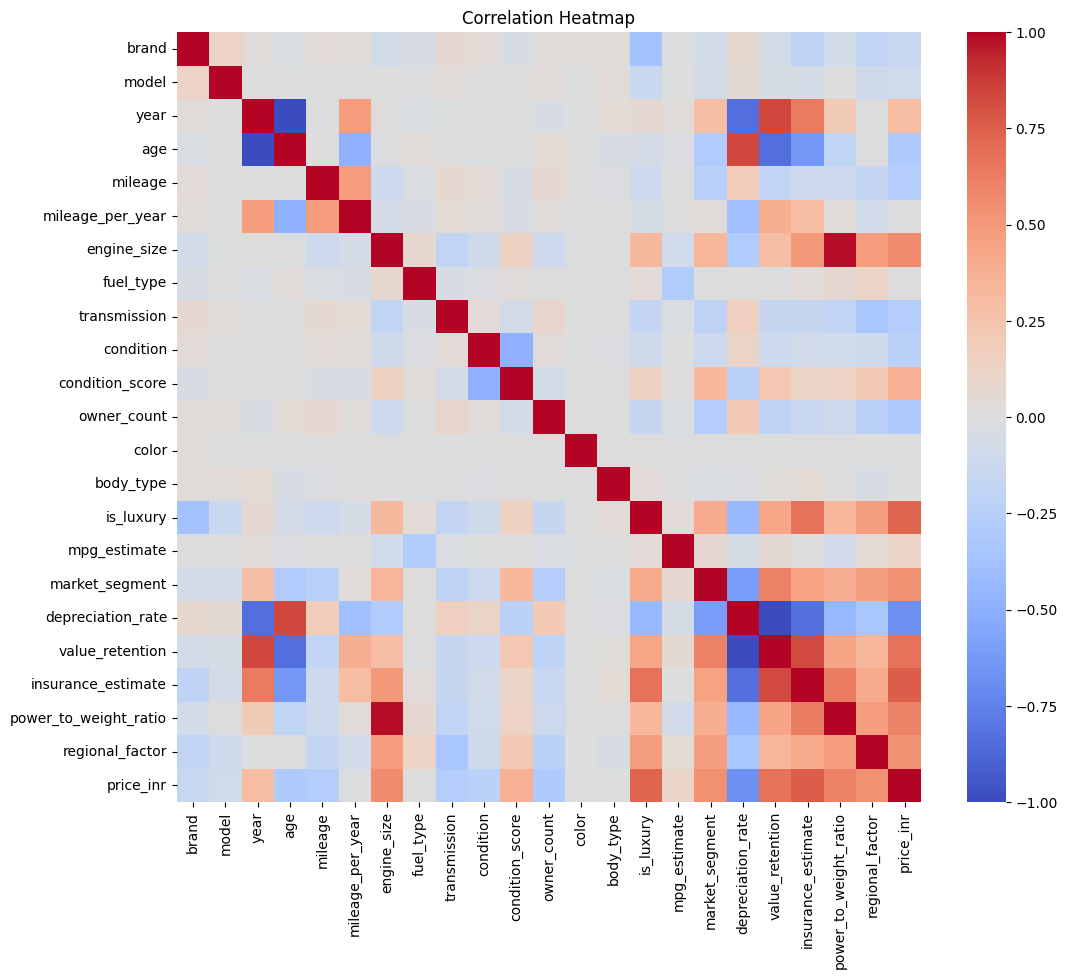

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df_model.corr()

# Top correlations with price_inr
top_corr = corr['price_inr'].sort_values(ascending=False)
print("Top correlations with price_inr:\n", top_corr.head(15))

# Heatmap (optional visual)
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


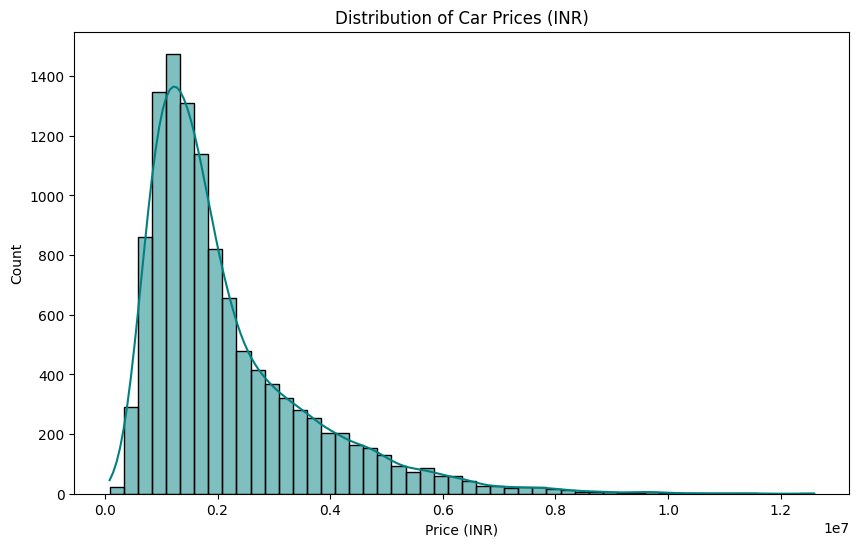

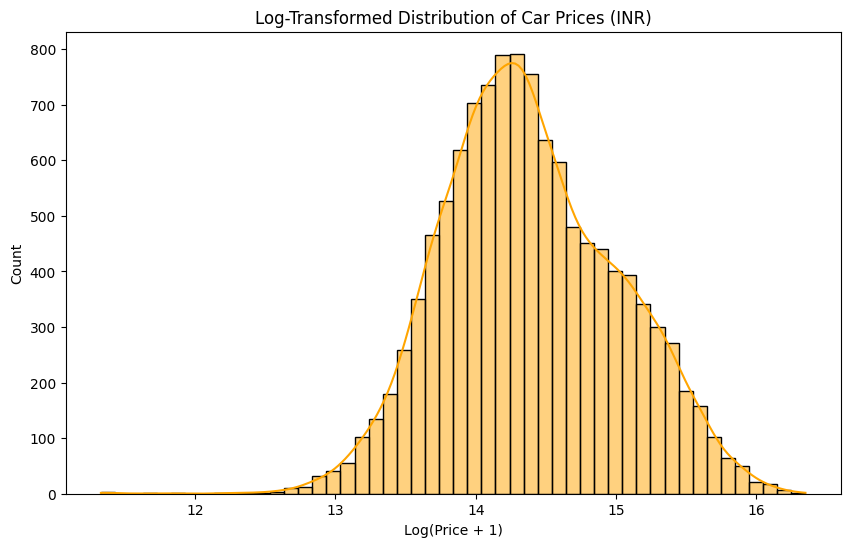

In [50]:
# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df_model['price_inr'], bins=50, kde=True, color='teal')
plt.title("Distribution of Car Prices (INR)")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()

# Optional: Log-transform visualization for skewed price
import numpy as np
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df_model['price_inr']), bins=50, kde=True, color='orange')
plt.title("Log-Transformed Distribution of Car Prices (INR)")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count")
plt.show()


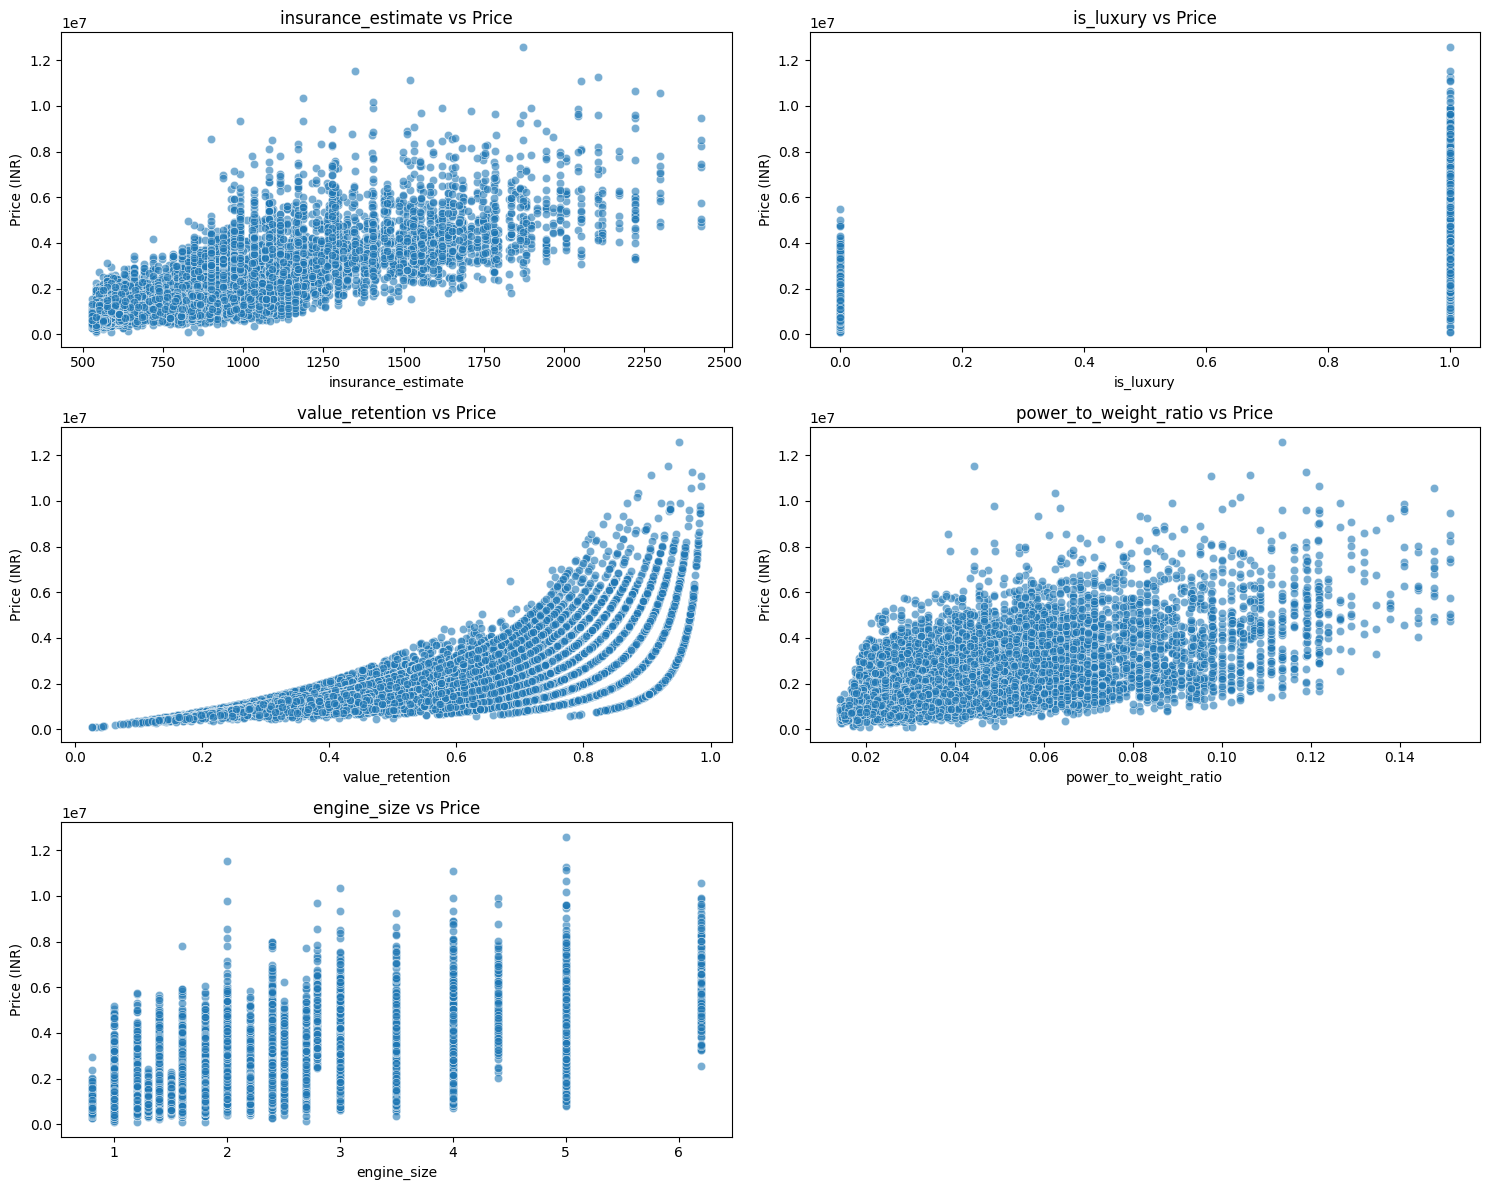

In [51]:
# Top features from correlation: insurance_estimate, is_luxury, value_retention, power_to_weight_ratio, engine_size
top_features = ['insurance_estimate', 'is_luxury', 'value_retention', 'power_to_weight_ratio', 'engine_size']

plt.figure(figsize=(15,12))

for i, feat in enumerate(top_features):
    plt.subplot(3,2,i+1)
    sns.scatterplot(data=df_model, x=feat, y='price_inr', alpha=0.6)
    plt.title(f'{feat} vs Price')
    plt.xlabel(feat)
    plt.ylabel('Price (INR)')

plt.tight_layout()
plt.show()


# MODEL TRYING

In [62]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Categorical columns
cat_cols = ['brand', 'model', 'fuel_type', 'transmission', 'condition', 'color', 'body_type', 'market_segment']

# Dictionary to store LabelEncoders
encoders = {}

# Fit encoders on original strings
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])  # Fit & transform original strings
    encoders[col] = le

# Save encoders for later prediction
joblib.dump(encoders, "label_encoders.pkl")


['label_encoders.pkl']

In [63]:
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=['price_inr'])
y = df_model['price_inr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Compare XGBOOST AND RANDOMFOREST

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # manually take sqrt
r2_rf = r2_score(y_test, y_pred_rf)

print("RandomForest -> RMSE:", round(rmse_rf, 0), "R2:", round(r2_rf, 4))

# XGBoost
xg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)

rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))
r2_xg = r2_score(y_test, y_pred_xg)

print("XGBoost -> RMSE:", round(rmse_xg, 0), "R2:", round(r2_xg, 4))


RandomForest -> RMSE: 247193.0 R2: 0.9735
XGBoost -> RMSE: 194046.0 R2: 0.9837


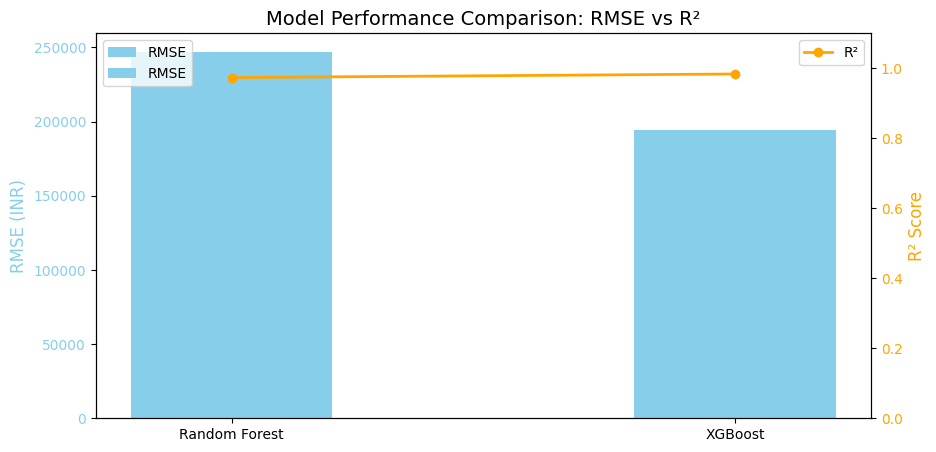

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'XGBoost']

# RMSE and R2 values
rmse_values = [247193, 194046]
r2_values = [0.9735, 0.9837]

x = np.arange(len(models))  # positions for bars
width = 0.4

fig, ax1 = plt.subplots(figsize=(10,5))

# Plot RMSE on primary y-axis
bars = ax1.bar(x, rmse_values, width, color='skyblue', label='RMSE')
ax1.set_ylabel('RMSE (INR)', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_title('Model Performance Comparison: RMSE vs R²', fontsize=14)

# Plot R2 on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(x, r2_values, color='orange', marker='o', linewidth=2, label='R²')
ax2.set_ylabel('R² Score', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 1.1)  # slightly above 1 for visual comfort

# Add legends
bars_labels = ax1.bar(x, rmse_values, width, color='skyblue', label='RMSE')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [79]:
import joblib

# Save best model
joblib.dump(xg, "car_price_xgb_model.pkl")



['car_price_xgb_model.pkl']

In [80]:
from sklearn.preprocessing import LabelEncoder
import joblib

cat_cols = ['brand', 'model', 'fuel_type', 'transmission', 'condition', 'color', 'body_type', 'market_segment']
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = df_model[col].astype(str)  # ensure string type
    df_model[col] = le.fit_transform(df_model[col])
    encoders[col] = le

joblib.dump(encoders, "label_encoders.pkl")


['label_encoders.pkl']

In [70]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_model.drop(columns=['price_inr'])
y = df_model['price_inr']

# Train XGBoost on full dataset
xg_full = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xg_full.fit(X, y)

# Save the final model
import joblib
joblib.dump(xg_full, "car_price_xgb_model_final.pkl")
print("✅ Final XGBoost model trained on full dataset and saved!")


✅ Final XGBoost model trained on full dataset and saved!


In [77]:
# Load final model and encoders
model = joblib.load("car_price_xgb_model_final.pkl")
encoders = joblib.load("label_encoders.pkl")

cat_cols = ['brand', 'model', 'fuel_type', 'transmission', 'condition', 'color', 'body_type', 'market_segment']

def predict_car_price(car_details: dict):
    df_input = pd.DataFrame([car_details])
    
    # Encode categorical columns safely
    for col in cat_cols:
        # strip and lower case if needed
        if isinstance(df_input[col].iloc[0], str):
            df_input[col] = df_input[col].str.strip()
            
        if df_input[col].iloc[0] not in encoders[col].classes_:
            raise ValueError(f"Unknown label '{df_input[col].iloc[0]}' in column '{col}'")
        df_input[col] = encoders[col].transform(df_input[col].values)
    
    predicted_price = model.predict(df_input)[0]
    return round(predicted_price, 0)
